In [14]:
with open('BBox_List_2017.csv','r') as bboxes:
    boxes = []
    for row in bboxes:
        boxes.append(row.strip().split(','))
boxes.pop(0)
boxes.sort(key=lambda x: x[0])

In [15]:
with open('Data_Entry_2017.csv','r') as csv:
    subjects = []
    for row in csv:
        subjects.append(row.strip().split(','))
    subjects.pop(0)
    subjects.sort(key=lambda x: x[0])

['356.503703703704', '567.805291005291', '127.86455026455', '82.3534391534392'] 1024
44 70 15 10


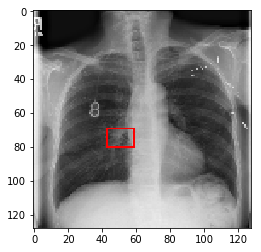

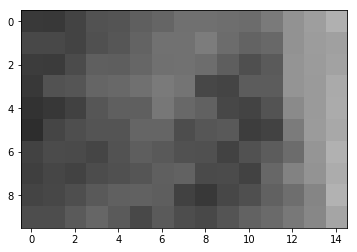

In [49]:
import cv2
import matplotlib.pyplot as plt
import os
imgdir = 'C:/Science Research/xraynet_data/images/images/train'
fig = plt.figure()
dex = 1
size = 128
img = cv2.imread(f'{imgdir}/abnormal/{boxes[dex][0]}',cv2.IMREAD_COLOR)
print(boxes[dex][2:], len(img[0]))
x,y,w,h = list(map(lambda x: int(size*(float(x)/len(img[0]))),boxes[dex][2:]))
print(x,y,w,h)
img = cv2.resize(img, (size,size))
cv2.rectangle(img, (x-1,y-1), (x+w,y+h), (255,0,0), thickness=1)
crop_img = img[y:y+h, x:x+w]
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(crop_img,cmap='gray')
plt.show()

In [5]:
import pandas as pd

all_ill = ['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

def get_list_by_diagnosis(diag='No Finding', show_multi = False):
    return [case for case in subjects if (diag == case[1] if show_multi == False else diag in case[1])]
print('Diagnosis, Number of Solo-Cases, Number of Multi-Cases')

multi = []
solo = []

for ill in all_ill:
    solo.append(len(get_list_by_diagnosis(ill)))
    multi.append(len(get_list_by_diagnosis(ill,True)))
#for ill in all_ill:
    #print(ill,len(get_list_by_diagnosis(ill)),len(get_list_by_diagnosis(ill,True)))

d = {'Number of Multi-Cases':multi,'Number of Solo-Cases':solo}
df = pd.DataFrame(data=d, index = all_ill, columns = ['Number of Solo-Cases','Number of Multi-Cases'])
df = df.sort_values(by='Number of Solo-Cases',ascending=False)
df

Diagnosis, Number of Solo-Cases, Number of Multi-Cases


,Number of Solo-Cases,Number of Multi-Cases
No Finding,60412,60412
Infiltration,9551,19870
Atelectasis,4212,11535
Effusion,3959,13307
Nodule,2706,6323
Pneumothorax,2199,5298
Mass,2138,5746
Consolidation,1314,4667
Pleural_Thickening,1127,3385
Cardiomegaly,1094,2772


In [6]:
## RUN ONCE TO ORGANIZE DATA INTO FOLDERS###

healthy = get_list_by_diagnosis()
healthy = [case[0] for case in healthy]

for image in os.listdir(f'{imgdir}'):
    if image[-3:] == 'png':
        if image in healthy:
            os.rename(f'{imgdir}/{image}', f'{imgdir}/normal/{image}')
        if image not in healthy:
            os.rename(f'{imgdir}/{image}', f'{imgdir}/abnormal/{image}')